In [3]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
import plotly.offline
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
import kaleido
from matplotlib_venn import venn3, venn3_circles

from matplotlib import pyplot as plt
%matplotlib inline


In [31]:
csv = 'all.csv'
##leer el csv
dfAll = pd.read_csv(csv)
##volver las columnas date and release_date en fechas
dfAll['date'] = pd.to_datetime(dfAll['date'], format='%d/%m/%Y')
dfAll['release_date'] = pd.to_datetime(dfAll['release_date'], format='%d/%m/%Y')
dfAll = dfAll.groupby(['artist_full', 'song', 'date'])['rank', 'main_artist', 'featured_artist_1', 'featured_artist_2',
'featured_artist_3', 'semanas_en_rank', 'peak_rank', 'explicit', 'release_date', 'cantidad_de_features', 'duration_ms'].first().reset_index()
##Separar los años
dfAll['year'] = dfAll.date.dt.year
dfAll['release_year'] = dfAll.release_date.dt.year
##Columa con canción completa
dfAll['canción'] = dfAll['song'] + '  ' + '<br>' + dfAll['artist_full'] + '  '
##Boolean si tiene feat,
dfAll['has_features'] = (dfAll['featured_artist_1'].ne('') & dfAll['featured_artist_1'].notnull()).astype(int)
dfAll['month'] = dfAll.release_date.dt.month_name()
##seleccionar solo los años 2010 y 2020
dfAll= dfAll[(dfAll['year'] == 2010) | (dfAll['year'] == 2020)]
print(dfAll[dfAll['year'] == 2010].shape[0])
##juntar duplicates 

C:\Users\MARIAT~1\AppData\Local\Temp/ipykernel_9604/2426582170.py:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



1452


In [5]:
##contar todas las entradas explicitas y no explicitas
dfExplicit = dfAll.groupby(['explicit', 'year'])['explicit'].count().reset_index(name="cantidad")
dfExplicit= dfExplicit.sort_values(by ="year")


In [6]:
##Sunburst con los porcentajes generales de canciones explícitas
figExplicitAll = sunburstYearExplicit = px.sunburst(dfExplicit, title ='¿Es explícita?',
                                        path=['explicit', 'year'],
                                        values = 'cantidad',
                                        color = 'cantidad',
                                        labels = {'parent' : '','explicit': 'explícito', 'id' : 'Sección', 'labels' : 'Sección', 'cantidad_sum' : 'Total de entradas'}
                                        )
figExplicitAll.update_traces(textinfo="label+percent root", insidetextorientation='horizontal' )
                                        
figExplicitAll.show()

##exportatSunburst
figExplicitAll.write_html("charts/explícito-SunburstGeneral.html", include_plotlyjs=False,full_html=False)





In [7]:
##Separar la cantidad de explícitos por año
dataFrameExplicit = dfAll[dfAll['explicit'] == 'si'].groupby('year')['explicit'].count().reset_index()
dataFrameExplicit = dataFrameExplicit.rename(columns={'explicit' : 'si'})

##Separar la cantidad de NO explícitos por año
dataFrameNotExplicit = dfAll[dfAll['explicit'] == 'no'].groupby('year')['explicit'].count().reset_index()
dataFrameNotExplicit = dataFrameNotExplicit.rename(columns={'explicit' : 'no'})

##Unir en cuadro comparativo
dataFrameExplicitBarChart = dataFrameExplicit.merge(dataFrameNotExplicit, how='inner', on='year')

##Suma de entradas totales por año + creación de columna de porcentaje + fusión con el frame por entradas
dataFrameExplicitBarChart['total'] = dataFrameExplicitBarChart['si'] + dataFrameExplicitBarChart['no']
dfExplicitComb = dfExplicit.merge(dataFrameExplicitBarChart, how='inner', on='year')
dfExplicitComb['percentage'] = (dfExplicitComb['cantidad']) / (dfExplicitComb['total'] / 100)
y = dfExplicitComb['percentage']
##figura con slider evolucion de canciones explícitas
figExplicitAllBars = px.bar(dfExplicitComb, 
                                    x=['year', 'explicit'],
                                    y = 'percentage',                               
                                    labels = {'explicit' : '¿Es explícita?', 'percentage' : 'Porcentaje', 'year' : 'Año', 'value' : 'Año'},
                                    title = 'Porcentaje de canciones explícitas por año',
                                    color= 'explicit',
                                    
                                    )
figExplicitAllBars.update_xaxes(type='category')
figExplicitAllBars.update_xaxes(fixedrange=True)
figExplicitAllBars.update_yaxes(fixedrange=True)

figExplicitAllBars.add_annotation(text="75.55%",
                  xref="paper", yref="paper",
                  x=0.22, y=0.4, showarrow=False)

figExplicitAllBars.add_annotation(text="24.45%",
                  xref="paper", yref="paper",
                  x=0.22, y=0.9, showarrow=False)

figExplicitAllBars.add_annotation(text="57.74%",
                  xref="paper", yref="paper",
                  x=0.78, y=0.4, showarrow=False)

figExplicitAllBars.add_annotation(text="42.26%",
                  xref="paper", yref="paper",
                  x=0.78, y=0.9, showarrow=False)


figExplicitAllBars.add_annotation(
            text="¡Crecimiento del 82.25%",
            xref="paper", yref="paper",
            x=0.5, y=0.9, showarrow=True)

figExplicitAllBars.add_shape(type="line",
xref="paper", yref="paper",
    x0=0.55, y0=0.9, x1=0.45, y1=0.9,
    line=dict(
        width=1,
    ))


figExplicitAllBars.show()

##Exportar
figExplicitAllBars.write_html("charts/explícito-barrasConSlider.html", include_plotlyjs=False,full_html=False)



In [8]:
## pie chart de entradas explícitas, decada 2010s                                       
figExplicit10s = pieChartExplicit10s = px.pie(dfExplicit[dfExplicit.year < 2012], 
                        title= 'Canciones explícitas, 2010',
                            values='cantidad',
                            names = 'explicit',
                            labels= {'explicit' : 'Explícita', 'cantidad' : 'Total de entradas'})
figExplicit10s.show()
##Exportar
figExplicit10s.write_html("charts/explícito-2010sPieChart.html", include_plotlyjs=False,full_html=False)

## pie chart de entradas explícitas, decada 2020s         
figExplicit20s = pieChartExplicit20s = px.pie(dfExplicit[dfExplicit.year > 2012], 
                        title= 'Canciones explícitas, 2020',
                            values='cantidad',
                            names = 'explicit',
                            labels= {'explicit' : 'Explícita', 'cantidad' : 'Total de entradas'})
figExplicit20s.show()
figExplicit20s.write_html("charts/explícito-2020sPieChart.html", include_plotlyjs=False,full_html=False)

In [51]:
## Lista de meses
meses = {'month' : ['January', 'February', 'March', 'April','May','June','July', 'August', 'September', 'October', 'November', 'December'],
'Mes' : ['Enero', 'Febrero', 'Marzo', 'Abril','Mayo','Junio','Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']}
dfMeses = pd.DataFrame(data=meses)
#Juntar con meses
songsPerYeartodo = dfAll.merge(dfMeses, how= 'left', on= 'month')
songsPerYeartodo = songsPerYeartodo[songsPerYeartodo['rank'] == 1]
songsPerYeartodo = songsPerYeartodo.sort_values(by="rank", ascending = True)
##Agrupar canciones y rankearlas

songsPerYeartodo = songsPerYeartodo.groupby(['canción', 'artist_full', 'date'])['rank','peak_rank','release_year', 'song', 'year', 'Mes'].first().reset_index()
songsPerYeartodo = songsPerYeartodo.sort_values(by='year', ascending = True)

songsPerYearN1 = songsPerYeartodo[songsPerYeartodo['rank'] ==1]


songsPerYear = songsPerYearN1.groupby(['year', 'canción', 'artist_full']).agg({'rank': 'max', 
                                                            'peak_rank' : 'min', 
                                                            'release_year' : 'first', 'Mes' : 'first',
                                                            'song' : 'count'}).rename(columns={'rank':'rank_máximo',                      
                                                                                                'song' : 'semanas_totales'}).reset_index() 
songsPerYeartodo = songsPerYeartodo.groupby(['year', 'canción', 'artist_full']).agg({'rank': 'max', 
                                                            'peak_rank' : 'min', 
                                                            'release_year' : 'first', 'Mes' : 'first',
                                                            'song' : 'count'}).rename(columns={'rank':'rank_máximo',                      
                                                                                                'song' : 'semanas_totales'}).reset_index() 
songsPerYeartodo = songsPerYeartodo[songsPerYeartodo['year'] == 2010].sort_values(by=['semanas_totales'], ascending=False).reset_index()
print(songsPerYeartodo.head())
##Orden de prioridad del ranking
songsPerYear = songsPerYear.sort_values(by=['year', 'peak_rank', 'semanas_totales'], ascending=[True, True, False]).reset_index()

##Excluir rangos especificos para disminuir el output


#gráfico slider mostrando las canciones más resaltantes 2010
TopSongs2010 = TopSongsChart = px.bar(songsPerYear[songsPerYear['year'] == 2010][::-1],
                                    x='semanas_totales',
                                    y = 'canción',
                                    height = 900,
                                    hover_data=['peak_rank', 'semanas_totales', 'release_year', 'Mes'],
                                    labels = {'rank_máximo' : 'Rank máximo', 'canción' : 'Canción',
                                    'year' : 'Año', 'semanas_totales' : 'Semanas en el rank', 'peak_rank' : 'Mejor puesto', 'release_year' : 'Año de lanzamiento'},
                                    title = 'Top canciones del año 2010, ordenadas por mejor puesto y cantidad de semanas en el chart',                                   
                                    range_x=[0,35] )
                                    

                             
TopSongs2010.show()
#exportar
TopSongs2010.write_html("charts/general-TopSongs2010.html", include_plotlyjs=False,full_html=False, auto_play=False)

#gráfico slider mostrando las canciones más resaltantes 2020
TopSongs2020 = TopSongsChart2020 = px.bar(songsPerYear[songsPerYear['year'] == 2020][::-1],
                                    x='semanas_totales',
                                    y = 'canción',
                                    hover_data=['peak_rank', 'semanas_totales', 'release_year', 'Mes'],
                                    labels = {'rank_máximo' : 'Rank máximo', 'canción' : 'Canción',
                                    'year' : 'Año', 'semanas_totales' : 'Semanas en el rank', 'peak_rank' : 'Mejor puesto', 'release_year' : 'Año de lanzamiento'},
                                    title = 'Top canciones del año 2020, ordenadas por mejor puesto y cantidad de semanas en el chart',                                   
                                    height=900,
                                    range_x=[0,55]
                                    
                                    )
  
TopSongs2020.show()
#exportar
TopSongs2020.write_html("charts/general-TopSongs2020.html", include_plotlyjs=False,full_html=False, auto_play=False)


C:\Users\MARIAT~1\AppData\Local\Temp/ipykernel_9604/3113663875.py:11: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



   index  year                                          canción  \
0     14  2010                             TiK ToK  <br>Ke$ha     
1      6  2010     Love The Way You Lie  <br>Eminem & Rihanna     
2      1  2010  California Gurls  <br>Katy Perry & Snoop Dogg     
3     12  2010                          Rude Boy  <br>Rihanna     
4      4  2010           Just The Way You Are  <br>Bruno Mars     

               artist_full  rank_máximo  peak_rank  release_year     Mes  \
0                    Ke$ha            1          1          2009  Agosto   
1         Eminem & Rihanna            1          1          2010   Junio   
2  Katy Perry & Snoop Dogg            1          1          2010    Mayo   
3                  Rihanna            1          1          2010   Enero   
4               Bruno Mars            1          1          2010   Junio   

   semanas_totales  
0                9  
1                7  
2                6  
3                5  
4                4  


In [10]:
#separar por decada para futuro

todo2010s = dfAll[dfAll.year < 2012]
todo2020s = dfAll[dfAll.year >2012]

#seleccionar canciones que llegaron a n1, 2010s

songsThatReachedN12010s = songsPerYear[songsPerYear['year']== 2010]
totalSongs2010s = songsPerYeartodo[songsPerYeartodo['year']== 2010]

#seleccionar canciones que llegaron a n1, 2020s
songsThatReachedN12020s = songsPerYear[songsPerYear['year']== 2020]
totalSongs2020s = songsPerYeartodo[songsPerYeartodo['year']== 2020]


#Figuras con canciones que llegaron a n1

figN1PercentagePie2010s = px.pie(
                                title = 'Porcentaje de canciones que llegaron a N°1, 2010',
                                names = ['No llegaron', 'Llegaron a N°1'], 
                                values = [(totalSongs2010s.shape[0] - songsThatReachedN12010s.shape[0]), songsThatReachedN12010s.shape[0]])
figN1PercentagePie2010s.show()
figN1PercentagePie2010s.write_html("charts/general-Numero1Cantidad2010.html", include_plotlyjs=False,full_html=False, auto_play=False)

figN1PercentagePie2020s = px.pie(
                                title = 'Porcentaje de canciones que llegaron a N°1, 2020',
                                names = ['No llegaron', 'Llegaron a N°1'], 
                                 values = [(totalSongs2020s.shape[0] - songsThatReachedN12020s.shape[0]), songsThatReachedN12020s.shape[0]])
figN1PercentagePie2020s.show()

figN1PercentagePie2020s.write_html("charts/general-Numero1Cantidad2020.html", include_plotlyjs=False,full_html=False, auto_play=False)


In [11]:

topMainArtists = dfAll.groupby(['canción', 'date'])['release_year', 'song', 'year', 'main_artist'].first().reset_index()
topMainArtists = topMainArtists.groupby(['main_artist' , 'canción']).agg({'release_year' : 'first', 'year' : 'first', 
 'song' : 'count'}).rename(columns={'song' : 'semanas_totales'}).reset_index()
topMainArtists = topMainArtists.sort_values(by='semanas_totales', ascending = False)

topMainArtistsGroupedAll = topMainArtists.groupby('main_artist').agg({'canción' : 'count',
 'semanas_totales' : 'sum', 'year' : 'first'}).reset_index()


topMainArtistsGroupedAllMostSongs = topMainArtistsGroupedAll.sort_values(by='canción', ascending = False, ignore_index = True).head(10)
topMainArtistsGroupedAllSort = topMainArtistsGroupedAll.sort_values(by='semanas_totales', ascending = False, ignore_index = True).head(10)
#grafico junto

figTopArtistsAll = px.bar(topMainArtistsGroupedAllSort.sort_values(by='semanas_totales', ascending = True ), 
                                                    x='main_artist', 
                                                    y='semanas_totales', 
                                                    color='year', 
                                                    labels = {'main_artist' : 'Artista', 'semanas_totales' : 'Semanas totales',
                                                    'year' : 'Año'},
                                                    hover_name="semanas_totales", 
                                                    title = 'Artistas con más semanas en el rank, 2010 + 2020',
                                                 
                                                    )
figTopArtistsAll.show()
figTopArtistsAll.write_html("charts/general-Massemanasenrank2010+2020.html", include_plotlyjs=False,full_html=False, auto_play=False)
figTopArtistsAll.write_image("images/figTopArtistsAll.svg")

figTopArtistsAllMostSongs = px.bar(topMainArtistsGroupedAllMostSongs.sort_values(by='canción', ascending = True ), 
                                                    x='main_artist', 
                                                    y='canción', 
                                                    color='year', 
                                                    labels = {'main_artist' : 'Artista', 'semanas_totales' : 'Semanas totales',
                                                    'year' : 'Año', 'canción' : 'Cantidad de canciones'},                                                
                                                    hover_name="year", 
                                                    title = 'Artistas con más canciones en el rank, 2010 + 2020',
                                   
                                                    )
figTopArtistsAllMostSongs.show()
figTopArtistsAllMostSongs.write_html("charts/general-Mascancionesenrank2010+2020.html", include_plotlyjs=False,full_html=False, auto_play=False)
figTopArtistsAllMostSongs.write_image("images/figTopArtistsAllMostSongs.svg")

C:\Users\MARIAT~1\AppData\Local\Temp/ipykernel_9604/2938892787.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [12]:
##separar
topMainArtists2010s = topMainArtists[(topMainArtists['year']< 2012)]
topMainArtists2020s = topMainArtists[(topMainArtists['year']> 2012)]


##agrupados 2010
topMainArtistsGrouped2010s = topMainArtists2010s.groupby('main_artist').agg({'canción' : 'count',
 'semanas_totales' : 'sum', 'year' : 'first'}).reset_index()

##sort
topMainArtistsGrouped2010s = topMainArtistsGrouped2010s.sort_values(by='semanas_totales', ascending = False)
Artists2010 = topMainArtistsGrouped2010s

##gráfico
topMainArtistsGrouped2010s['main_artist'] = topMainArtistsGrouped2010s['main_artist'] + '  '
topMainArtistsGrouped2010MostSongs = topMainArtistsGrouped2010s.sort_values(by='canción', ascending = False, ignore_index = True)
topMainArtistsGrouped2010MostSongs = topMainArtistsGrouped2010MostSongs[topMainArtistsGrouped2010MostSongs['canción'] > 1]

print(topMainArtistsGrouped2010MostSongs.shape[0])

figTopArtists2010s = px.bar(topMainArtistsGrouped2010s.head(10).sort_values(by='semanas_totales', ascending = True), 
                                                    y='main_artist', 
                                                    x='semanas_totales', 
                                                    color='canción', 
                                                     labels = {'main_artist' : 'Artista', 'semanas_totales' : 'Semanas totales',
                                                    'year' : 'Año', 'canción' : 'Cantidad de canciones'},  
                                                    hover_name="semanas_totales", 
                                                    title = 'Artistas con más semanas en el rank 2010',
                                                   
                                                    )
figTopArtists2010s.show()
figTopArtists2010s.write_html("charts/general-Massemanasenrank2010.html", include_plotlyjs=False,full_html=False, auto_play=False)
figTopArtists2010s.write_image("images/figTopArtists2010s.svg")
figTopArtists2010MostSongs = px.bar(topMainArtistsGrouped2010MostSongs.sort_values(by='canción', ascending = True ), 
                                                    y='main_artist', 
                                                    x='canción', 
                                                    color='semanas_totales',                                                 
                                                    hover_name="year", 
                                                    title = 'Artistas con más canciones en el rank, 2010',
                                                    labels = {'main_artist' : 'Artista', 'semanas_totales' : 'Semanas totales',
                                                    'year' : 'Año', 'canción' : 'Cantidad de canciones'},  
                                   
                                                    )
figTopArtists2010MostSongs.show()
figTopArtists2010MostSongs.write_html("charts/general-Mascancionesenrank2010.html", include_plotlyjs=False,full_html=False, auto_play=False)
figTopArtists2010MostSongs.write_image("images/figTopArtists2010MostSongs.svg")

18


In [13]:
##agrupados 2020
topMainArtistsGrouped2020s = topMainArtists2020s.groupby('main_artist').agg({'canción' : 'count', 
'semanas_totales' : 'sum', 'year' : 'first'}).reset_index()

##sort
topMainArtistsGrouped2020s = topMainArtistsGrouped2020s.sort_values(by='semanas_totales', ascending = False)
Artists2020 = topMainArtistsGrouped2020s
#gráfico
topMainArtistsGrouped2020s['main_artist'] = topMainArtistsGrouped2020s['main_artist'] + '  '
topMainArtistsGrouped2020MostSongs = topMainArtistsGrouped2020s.sort_values(by='canción', ascending = False, ignore_index = True)
topMainArtistsGrouped2020MostSongs = topMainArtistsGrouped2020MostSongs[topMainArtistsGrouped2020MostSongs['canción'] > 1]

print(topMainArtistsGrouped2020MostSongs.shape[0])

figTopArtists2020s = px.bar(topMainArtistsGrouped2020s.head(10).sort_values(by='semanas_totales', ascending = True), 
                                y='main_artist', 
                                x='semanas_totales', 
                                color='canción', 
                                labels = {'main_artist' : 'Artista', 'semanas_totales' : 'Semanas totales',
                                                    'year' : 'Año', 'canción' : 'Cantidad de canciones'},  
                                hover_name="semanas_totales", 
                                title = 'Artistas con más semanas en el rank, 2020',
                                
                               )
figTopArtists2020s.show()
figTopArtists2020s.write_html("charts/general-Massemanasenrank2020.html", include_plotlyjs=False,full_html=False, auto_play=False)
figTopArtists2020s.write_image("images/figTopArtists2020s.svg")

figTopArtists2020MostSongs = px.bar(topMainArtistsGrouped2020MostSongs.sort_values(by='canción', ascending = True ), 
                                                    y='main_artist', 
                                                    x='canción', 
                                                    color='semanas_totales',                                                 
                                                    hover_name="year", 
                                                    title = 'Artistas con más canciones en el rank, 2020',
                                                    labels = {'main_artist' : 'Artista', 'semanas_totales' : 'Semanas totales',
                                                    'year' : 'Año', 'canción' : 'Cantidad de canciones'},  
                                   
                                                    )
figTopArtists2020MostSongs.show()
figTopArtists2020MostSongs.write_html("charts/general-Mascancionesenrank2020.html", include_plotlyjs=False,full_html=False, auto_play=False)
figTopArtists2020MostSongs.write_image("images/figTopArtists2020MostSongss.svg")


19


In [14]:
dfNumOne2010s = songsThatReachedN12010s

dfNumOne2020s = songsThatReachedN12020s

#canciones en number 1
cancionesNumOne2010s = songsThatReachedN12010s['canción'].count()
cancionesNumOne2020s = songsThatReachedN12020s['canción'].count()


#artistas en number 1

dfNumOneArtistas2010s = songsThatReachedN12010s.groupby(['artist_full'])['year'].min().reset_index()
dfNumOneArtistas2020s = songsThatReachedN12020s.groupby(['artist_full'])['year'].min().reset_index()

ArtistasNumOne2010s = dfNumOneArtistas2010s.shape[0]
ArtistasNumOne2020s = dfNumOneArtistas2020s.shape[0]

#Promedio de semanas en chart

promedioSemanasTotal2010s =topMainArtists2010s['semanas_totales'].mean()
promedioSemanasTotal2020s = topMainArtists2020s['semanas_totales'].mean()

#Cantidad de artistas unicos

promedioArtistas2010s = topMainArtistsGrouped2010s['main_artist'].count()
promedioArtistas2020s = topMainArtistsGrouped2020s['main_artist'].count()

#Cantidad de canciones únicas
cantidadDeCanciones2010s = topMainArtistsGrouped2010s['canción'].sum()
cantidadDeCanciones2020s = topMainArtistsGrouped2020s['canción'].sum()

#Promedio de n de canciones por artista
sPorArtista2010s = topMainArtistsGrouped2010s['canción'].mean()
PorArtista2020s = topMainArtistsGrouped2020s['canción'].mean()

topMainArtistsGroupedAllSongs = topMainArtists.groupby(['main_artist', 'year']).agg({'canción' : 'count',
 'semanas_totales' : 'sum'}).reset_index()
HCancionesPorArtista2010s = px.box(topMainArtistsGroupedAllSongs, 
                                            y='canción', 
                                            x='year', points="all", 
                                            title = 'Cantidad de canciones por artista en el ranking',
                                            labels = {'canción' : 'Cantidad de canciones', 'year' : 'Año', 'median' : 'Mediana'},
                                            color = 'year')
HCancionesPorArtista2010s.show()
HCancionesPorArtista2010s.write_image("images/HCancionesPorArtista2010s.svg")
HCancionesPorArtista2010s.write_html("charts/box-cancionesporartista.html", include_plotlyjs=False,full_html=False)

#Promedio de semanas en chart por artista
promedioSemanasPorArtista2010s = topMainArtistsGrouped2010s['semanas_totales'].mean()
promedioSemanasPorArtista2020s = topMainArtistsGrouped2020s['semanas_totales'].mean()

#Diccionario para gáfico
dec = { 'Década' : ['2010s','2020s'], 
'Número de canciones distintas' : [cantidadDeCanciones2010s, cantidadDeCanciones2020s],
'Cantidad de artistas' : [promedioArtistas2010s, promedioArtistas2020s],
'Canciones que llegaron al número 1' : [cancionesNumOne2010s, cancionesNumOne2020s],
'Artistas que llegaron al número 1' : [ArtistasNumOne2010s,ArtistasNumOne2020s]
}


#Pasarlo a DataFrame
resumen = pd.DataFrame(data=dec)



#Gráfico


In [15]:
canciones2010 = dfAll[dfAll['year'] == 2010].groupby(['canción']).count().shape[0]
canciones2020 = dfAll[dfAll['year'] == 2020].groupby('canción').count().shape[0]

artistas2010 = dfAll[dfAll['year'] == 2010].groupby('main_artist').count().shape[0]
artistas2020 = dfAll[dfAll['year'] == 2020].groupby('main_artist').count().shape[0]

years = [2010,2020]
indicadores = ['canciones', 'artistas']


fig = go.Figure(data=[
    go.Bar(name='Cantidad de canciones', x=years, y=[canciones2010, canciones2020]),
    go.Bar(name='Cantidad de artistas', x=years, y=[artistas2010, artistas2020])
])
fig.update_layout(barmode='group')
fig.update_layout(title='Comparación: cantidad de artistas y canciones únicas en el ránking, 2010 vs 2020')
fig.write_html("charts/artistasycancionescomp.html", include_plotlyjs=False,full_html=False)
fig.show()

In [16]:

dfWeeks = dfAll.groupby(['canción', 'year'])['song'].count().reset_index()
figSemanasPromedio = px.box(dfWeeks,
                            x='year', 
                            y='song', 
                            labels = {'year' : 'Año' , 'song' : 'Semanas'},
                            color='year',
                            points = 'all',
                            title = 'Cantidad de semanas en el ránking por canción, general')
figSemanasPromedio.show()
figSemanasPromedio.write_html("charts/semanasporcancion.html", include_plotlyjs=False,full_html=False)
figSemanasPromedio.write_image("images/figSemanasPromedio.svg")

dfWeeksByArtist = dfAll.groupby(['main_artist', 'date'])[['song', 'year']].first().reset_index()
dfWeeksByArtist = dfWeeksByArtist.groupby(['main_artist', 'year'])['song'].count().reset_index()

figSemanasPromedioPorArtista = px.box(dfWeeksByArtist,
                            x='year', 
                            y='song', 
                            labels = {'year' : 'Año' , 'song' : 'Semanas'},
                            color='year',
                            points = 'all',
 
                           title = 'Cantidad de semanas en el ránking por artista, general')
figSemanasPromedioPorArtista.write_html("charts/semanasporartista.html", include_plotlyjs=False,full_html=False)
figSemanasPromedioPorArtista.show()
figSemanasPromedioPorArtista.write_image("images/figSemanasPromedioPorArtista.svg")


In [17]:
#get all songs with features 
featuredSongs = dfAll[dfAll['has_features'] == 1].groupby('canción')['year', 'main_artist' , 'featured_artist_1', 'featured_artist_2', 'featured_artist_3', 'cantidad_de_features'].first().reset_index()

featuredSongsCantidad = featuredSongs.groupby(['cantidad_de_features', 'year'])['canción'].count().reset_index()
featuredSongsCantidad12010 = featuredSongs[(featuredSongs['year'] == 2010) & (featuredSongs['cantidad_de_features'] == 1)].shape[0]
featuredSongsCantidad12020 = featuredSongs[(featuredSongs['year'] == 2020) & (featuredSongs['cantidad_de_features'] == 1)].shape[0]

featuredSongsCantidad22010 = featuredSongs[(featuredSongs['year'] == 2010) & (featuredSongs['cantidad_de_features'] == 2)].shape[0]
featuredSongsCantidad22020 = featuredSongs[(featuredSongs['year'] == 2020) & (featuredSongs['cantidad_de_features'] == 2)].shape[0]

featuredSongsCantidad32010 = featuredSongs[(featuredSongs['year'] == 2010) & (featuredSongs['cantidad_de_features'] == 3)].shape[0]
featuredSongsCantidad32020 = featuredSongs[(featuredSongs['year'] == 2020) & (featuredSongs['cantidad_de_features'] == 3)].shape[0]


figFeat = go.Figure(data=[
    go.Bar(name='1 artista invitado', x=years, y=[featuredSongsCantidad12010, featuredSongsCantidad12020], text=[featuredSongsCantidad12010, featuredSongsCantidad12020], textposition='auto',),
    go.Bar(name='2 artistas invitados', x=years, y=[featuredSongsCantidad22010, featuredSongsCantidad22020], text=[featuredSongsCantidad22010, featuredSongsCantidad22020], textposition='auto',),
    go.Bar(name='3 artistas invitados', x=years, y=[featuredSongsCantidad32010, featuredSongsCantidad32020], text=[featuredSongsCantidad32010, featuredSongsCantidad32020], textposition='auto',),
    
])
figFeat.update_layout(barmode='group')
figFeat.update_layout(title='Cantidad de canciones con 1, 2 o 3 artistas invitados, 2010 vs 2020')
figFeat.write_html("charts/cantidaddeinvitaos.html", include_plotlyjs=False,full_html=False)
figFeat.show()

#Filtrar 2020
featured2020 = featuredSongs[featuredSongs['year'] > 2012]
featured2020Num = featured2020.shape[0]

#Filtrar 2010
featured2010 = featuredSongs[featuredSongs['year'] < 2012]
featured2010Num = featured2010.shape[0]
#get todas las canciones
totalsongs = dfAll[dfAll['has_features'] == 0]
totalsongs = totalsongs.groupby(['canción'])['year'].first().reset_index()

#Filtrar 2020
totalsongs2020 = totalsongs[totalsongs['year'] > 2012]
totalsongs2020Num = totalsongs2020.shape[0]

#Filtrar 2010
totalsongs2010 = totalsongs[totalsongs['year'] < 2012]
totalsongs2010Num = totalsongs2010.shape[0]

#diccionario con datos, 2020s y 2010s

dPieChartFeatures2010s = {'cantidad': [totalsongs2010Num, featured2010Num], 
                                    '¿Tiene artistas invitados?' : ['no', 'si']}


dPieChartFeatures2020s = {'cantidad': [totalsongs2020Num, featured2020Num], 
                                    '¿Tiene artistas invitados?' : ['no', 'si']}


#Converir diccionario a DataFrame
dfPieChartFeat2010s = pd.DataFrame(data=dPieChartFeatures2010s)
dfPieChartFeat2020s = pd.DataFrame(data=dPieChartFeatures2020s)

# gráficos
figpercentagefeat2020 = px.pie(dfPieChartFeat2020s, 
                                names= '¿Tiene artistas invitados?', 
                                values='cantidad',
                                title='Porcentaje de canciones con artistas invitados, 2020s')

figpercentagefeat2020.show()
figpercentagefeat2020.write_html("charts/invitaosporcentaje2010.html", include_plotlyjs=False,full_html=False)
figpercentagefeat2010 = px.pie(dfPieChartFeat2010s, 
                                names= '¿Tiene artistas invitados?', 
                                values='cantidad',
                                title='Porcentaje de canciones con artistas invitados, 2010s')

figpercentagefeat2010.show()
figpercentagefeat2010.write_html("charts/invitaosporcentaje2020.html", include_plotlyjs=False,full_html=False)



C:\Users\MARIAT~1\AppData\Local\Temp/ipykernel_9604/1480636208.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [18]:
## Featured Artists en 2020s

FeaturedArtists2020List = featured2020[['featured_artist_1', 'featured_artist_2','featured_artist_3']]
FeaturedArtists2020List = FeaturedArtists2020List['featured_artist_1'].tolist() + FeaturedArtists2020List['featured_artist_2'].tolist() + FeaturedArtists2020List['featured_artist_3'].tolist()
feat2020Data = {'Artistas invitados' : FeaturedArtists2020List,
                'Conteo' : FeaturedArtists2020List }
FeaturedArtists2020 = pd.DataFrame(data=feat2020Data)
FeaturedArtists2020 = FeaturedArtists2020.groupby('Artistas invitados')['Conteo'].count().reset_index()
FeaturedArtists2020 = FeaturedArtists2020.sort_values(by='Conteo', ascending = False)
FeaturedArtists2020Cut = FeaturedArtists2020[FeaturedArtists2020['Conteo'] > 1]


## Featured Artists en 2010s
FeaturedArtists2010List = featured2010[['featured_artist_1', 'featured_artist_2','featured_artist_3']]
FeaturedArtists2010List = FeaturedArtists2010List['featured_artist_1'].tolist() + FeaturedArtists2010List['featured_artist_2'].tolist() + FeaturedArtists2010List['featured_artist_3'].tolist()
feat2010Data = {'Artistas invitados' : FeaturedArtists2010List, 
                'Conteo' : FeaturedArtists2010List}
FeaturedArtists2010 = pd.DataFrame(data=feat2010Data)
FeaturedArtists2010 = FeaturedArtists2010.groupby('Artistas invitados')['Conteo'].count().reset_index()
FeaturedArtists2010 = FeaturedArtists2010.sort_values(by='Conteo', ascending = False)
FeaturedArtists2010Cut = FeaturedArtists2010[FeaturedArtists2010['Conteo'] > 1]

#table for featured artists 2020 
FeaturedArtists2020Table = go.Figure(data=[go.Table(
    header=dict(values=list(FeaturedArtists2020.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[FeaturedArtists2020['Artistas invitados'], FeaturedArtists2020Cut['Conteo']],
               fill_color='lavender',
               align='left'))
])
FeaturedArtists2020Table.update_layout(title='Artistas invitados más frecuentes, 2020')
FeaturedArtists2020Table.write_html("charts/artistasinvitados2020.html", include_plotlyjs=False,full_html=False)
FeaturedArtists2020Table.show()

#table for featured artists 2010 




FeaturedArtists2010Table = go.Figure(data=[go.Table(
    header=dict(values=list(FeaturedArtists2010.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[FeaturedArtists2010['Artistas invitados'], FeaturedArtists2010Cut['Conteo']],
               fill_color='lavender',
               align='left'))
])
FeaturedArtists2010Table.update_layout(title='Artistas invitados más frecuentes, 2010')
FeaturedArtists2010Table.write_html("charts/artistasinvitados2010.html", include_plotlyjs=False,full_html=False)
FeaturedArtists2010Table.show()




  Artistas invitados  Conteo
0              Drake       6
1        Nicki Minaj       3
2          Lil Wayne       2


{'Lil Durk', 'Chance The Rapper', 'Tory Lanez', '42 Dugg', 'Travis Scott', 'Megan Thee Stallion', 'Polo G', 'Gunna', 'Bon Iver', 'Don Toliver', 'Jason Derulo', 'NAV', 'M.I.A.', 'Drake', 'Ariana Grande', 'Lil Baby', 'Quavo', 'DaBaby', '9ine', 'Kid Cudi', 'Jhay Cortez', 'iann dior', 'The Weeknd', 'Charlie Puth', 'Young Thug', 'Nicki Minaj', 'Justin Bieber', 'Marshmello', 'Lil Wayne', 'Juice WRLD', 'The Kid LAROI', 'Roddy Ricch', 'Metro Boomin', 'Playboi Carti'}


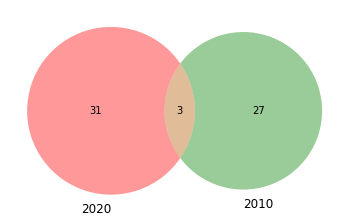

In [19]:
## featured astists que aparecen en las dos décadas
bothdecadesFull = FeaturedArtists2020.merge(FeaturedArtists2010, how='outer', on='Artistas invitados')
BothDecades  = FeaturedArtists2020.merge(FeaturedArtists2010, how='inner', on='Artistas invitados')
BothDecades['Conteo'] = BothDecades['Conteo_x'] + BothDecades['Conteo_y']
BothDecades = BothDecades.drop(['Conteo_x', 'Conteo_y'], axis=1)
BothDecades = BothDecades.sort_values(by='Conteo', ascending = False)
print(BothDecades)

FeaturedArtistsBothDecadesTable = go.Figure(data=[go.Table(
    header=dict(values=list(BothDecades.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[BothDecades['Artistas invitados'], BothDecades['Conteo']],
               fill_color='lavender',
               align='left'))
])
FeaturedArtistsBothDecadesTable.update_layout(title='Artistas invitados más frecuentes en ambas décadas')
FeaturedArtistsBothDecadesTable.write_html("charts/artistasinvitadostodo.html", include_plotlyjs=False,full_html=False)
FeaturedArtistsBothDecadesTable.show()

venn_1 = set(FeaturedArtists2020['Artistas invitados'])
venn_2 = set(FeaturedArtists2010['Artistas invitados'])
venn_3 = set(BothDecades['Artistas invitados'])
print(venn_1)
venn2(subsets=([venn_1, venn_2]),
set_labels = ('2020', '2010'))

In [20]:
#Main Artists All Decades

Artists2020 = topMainArtistsGrouped2020s

Artists2010 = topMainArtistsGrouped2010s
#get main artists 2020s
MainArtists2020 = Artists2020
#get main artists 2010s
MainArtists2010 = Artists2010

AllMainArtists = Artists2020.merge(Artists2010, how='outer', on='main_artist')
AllArtists  = bothdecadesFull.merge(AllMainArtists, how='outer', left_on='Artistas invitados', right_on='main_artist')
print(AllArtists)
BothDecadesArtists  = MainArtists2020.merge(MainArtists2010, how='inner', on='main_artist')
BothDecadesArtists['Conteo'] = BothDecadesArtists['canción_x'] + BothDecadesArtists['canción_y']
BothDecadesArtists = BothDecadesArtists.drop(['canción_x', 'semanas_totales_x', 'semanas_totales_y', 'year_x', 'year_y', 'canción_y'], axis=1)
BothDecadesArtists = BothDecadesArtists.rename(columns=({'main_artist' : 'Artista principal'}))
BothDecadesArtists = BothDecadesArtists.sort_values(by='Conteo', ascending = False)


ArtistsBothDecadesTable = go.Figure(data=[go.Table(
    header=dict(values=list(BothDecadesArtists.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[BothDecadesArtists['Artista principal'], BothDecadesArtists['Conteo']],
               fill_color='lavender',
               align='left'))
])

ArtistsBothDecadesTable.show()



    Artistas invitados  Conteo_x  Conteo_y          main_artist  canción_x  \
0                Drake       4.0       2.0                  NaN        NaN   
1        Justin Bieber       3.0       NaN                  NaN        NaN   
2           Marshmello       2.0       NaN                  NaN        NaN   
3        Ariana Grande       2.0       NaN                  NaN        NaN   
4           Young Thug       2.0       NaN                  NaN        NaN   
..                 ...       ...       ...                  ...        ...   
156                NaN       NaN       NaN  Artists For Haiti          NaN   
157                NaN       NaN       NaN            Jeremih          NaN   
158                NaN       NaN       NaN          Glee Cast          NaN   
159                NaN       NaN       NaN        Lupe Fiasco          NaN   
160                NaN       NaN       NaN              Adele          NaN   

     semanas_totales_x  year_x  canción_y  semanas_totales_y  y

In [21]:

##Primera fecha que llegaron a numero 1
songsWRatingN1 = dfAll
songsWRatingN1 = songsWRatingN1.sort_values(['rank', 'date'], ascending = True)
songsWRatingN1 = songsWRatingN1.groupby(['canción']).agg({'rank': 'first', 
'release_date' : 'first','date': 'first', 'year' : 'first'}).reset_index() 
songsWRatingN1 = songsWRatingN1.sort_values(['date', 'rank'], ascending = True)
print(songsWRatingN1[['canción', 'date', 'release_date']])


##Todas las canciones, primera aparición

songsWRatingFA = dfAll
songsWRatingFA = songsWRatingFA.sort_values(by='date', ascending = True).groupby(['canción']).agg({'rank': 'min', 
'release_date' : 'first', 'peak_rank' : 'min', 
'date': 'first', 'year' : 'first'}).reset_index() 
print(songsWRatingFA[['canción', 'date', 'release_date']])


                                               canción       date release_date
151                               TiK ToK  <br>Ke$ha   2010-01-02   2009-08-07
43     Empire State Of Mind  <br>Jay-Z + Alicia Keys   2010-01-02   2009-10-03
92          Meet Me Halfway  <br>The Black Eyed Peas   2010-01-02   2009-09-22
1                              3  <br>Britney Spears   2010-01-02   2009-09-29
113                                 Replay  <br>Iyaz   2010-01-09   2009-07-07
..                                                 ...        ...          ...
166                                  Whoopty  <br>CJ   2020-12-19   2020-07-30
169                   Without You  <br>The Kid LAROI   2020-12-19   2020-11-16
167                         Willow  <br>Taylor Swift   2020-12-26   2020-12-11
82   Let It Snow, Let It Snow, Let It Snow  <br>Dea... 2020-12-26   1959-11-16
124                 Run Rudolph Run  <br>Chuck Berry   2020-12-26   1959-11-19

[173 rows x 3 columns]
                            

In [22]:
##2010 - canciones 2010s numero 1
dfPeak2010sN1 = songsWRatingN1
dfPeak2010sN1 = dfPeak2010sN1[dfPeak2010sN1['year'] == 2010]
dfPeak2010sN1['dias_entre_lanzamiento_y_peak'] = (dfPeak2010sN1['date'] - dfPeak2010sN1['release_date']).dt.days.abs()
print(dfPeak2010sN1['dias_entre_lanzamiento_y_peak'])
##2010 - promedio de dias entre peak y lanzamiento


151    148
43      91
92     102
1       95
113    186
      ... 
153     33
64     102
117     77
39      88
120     26
Name: dias_entre_lanzamiento_y_peak, Length: 83, dtype: int64


C:\Users\MARIAT~1\AppData\Local\Temp/ipykernel_9604/3941299531.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
##2010 - canciones 2010s primera aparición en billboard
df2010sFA = songsWRatingFA[songsWRatingFA['year'] == 2010]
df2010sFA['dias_entre_lanzamiento_y_aparición'] = (df2010sFA['date'] - df2010sFA['release_date']).dt.days.abs()


print(df2010sFA['dias_entre_lanzamiento_y_aparición'] )
##2010 - promedio de dias entre aparición en billboardy lanzamiento

1       95
6       18
7      163
9       19
11      18
      ... 
162     11
163     43
164    242
170    179
171     87
Name: dias_entre_lanzamiento_y_aparición, Length: 83, dtype: int64


C:\Users\MARIAT~1\AppData\Local\Temp/ipykernel_9604/693361281.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
##2020 - canciones 2020s numero 1
dfPeak2020sN1 = songsWRatingN1[songsWRatingN1['year'] == 2020]
dfPeak2020sN1['dias_entre_lanzamiento_y_peak'] = (dfPeak2020sN1['date'] - dfPeak2020sN1['release_date']).dt.days.abs()



C:\Users\MARIAT~1\AppData\Local\Temp/ipykernel_9604/96520858.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
##2020 - primera aparición canciones en billboard
df2020sFA = songsWRatingFA[songsWRatingFA['year'] == 2020]
df2020sFA['dias_entre_lanzamiento_y_aparición'] = (df2020sFA['date'] - df2020sFA['release_date']).dt.days.abs()


C:\Users\MARIAT~1\AppData\Local\Temp/ipykernel_9604/2108489750.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
#join to compare release and peak
faVsPeak = songsWRatingN1.merge(songsWRatingFA, how='left', on=['canción','year'])
faVsPeak['dias_entre_peak_y_aparición'] = (faVsPeak['date_x'] - faVsPeak['date_y']).dt.days.abs()
print(faVsPeak['dias_entre_peak_y_aparición'])

relvsPeak = px.scatter(faVsPeak[faVsPeak['year'] == 2010], x='date_x', y="date_y", color='canción', 
title='Distribución, relación de días entre primera aparición y pico en Billboard, 2010',
labels = {'date_y' : 'Primera aparición', 'date_x' : 'Primera fecha n° 1 en Billboard', 'canción' : 'Canción'} )

relvsPeak.write_html("charts/releasevspeak2010.html", include_plotlyjs=False,full_html=False)
relvsPeak.show()
relvsPeak.write_image("images/relvsPeakPrimeraAparicion.svg")

relvsPeak2020 = px.scatter(faVsPeak[faVsPeak['year'] == 2020], x='date_x', y="date_y", color='canción', 
title='Distribución, relación de días entre primera aparición y pico en Billboard, 2020',
labels = {'date_y' : 'Primera aparición', 'date_x' : 'Primera fecha n° 1 en Billboard', 'canción' : 'Canción'} )
relvsPeak2020.write_html("charts/releasevspeak2020.html", include_plotlyjs=True,full_html=True)
relvsPeak2020.show()
relvsPeak2020.write_image("images/relvsPeakPrimeraAparicion2020.svg")
faVsPeakAverageComp = px.box( faVsPeak, x= 'year',
y = 'dias_entre_peak_y_aparición', points='all', color = 'year',
 title='Distribución, días entre primera aparición en Billboard y pico')
faVsPeakAverageComp.write_html("charts/diasrelease.html", include_plotlyjs=False,full_html=False)

faVsPeakAverageComp.show()
faVsPeakAverageComp.write_image("images/faVsPeakAverageComp.svg")
#average compare release and peak


0        0
1        0
2        0
3        0
4        7
      ... 
168     28
169      0
170      0
171    357
172    357
Name: dias_entre_peak_y_aparición, Length: 173, dtype: int64


##2010 - Figura, scatter de dias entre peak y lanzamiento
Peak2010N1 = px.scatter(dfPeak2010sN1, x='date', y="release_date", color='canción', 
labels = {'release_date' : 'fecha de lanzamiento', 'date' : 'Primera fecha n° 1 en Billboard', 'canción' : 'Canción'} )
Peak2010N1.show()


##2020 - Figura, scatter de dias entre peak y lanzamiento
Peak2020N1 = px.scatter(dfPeak2020sN1, x='date', y="release_date", color='canción', 
labels = {'release_date' : 'fecha de lanzamiento', 'date' : 'Primera fecha n° 1 en Billboard', 'canción' : 'Canción'} )
Peak2020N1.show()

##2010 - Figura, scatter de dias entre apariciony lanzamiento
Peak2010FA = px.scatter(df2010sFA, x='date', y="release_date", color='canción', 
labels = {'release_date' : 'fecha de lanzamiento', 'date' : 'Primera fecha en Billboard', 'canción' : 'Canción'} )
Peak2010FA.show()


##2020 - Figura, scatter de dias entre aparicion y lanzamiento
Peak2020FA = px.scatter(df2020sFA, x='date', y="release_date", color='canción', 
labels = {'release_date' : 'fecha de lanzamiento', 'date' : 'Primera fecha en Billboard', 'canción' : 'Canción'} )
Peak2020FA.show()







In [27]:

df = pd.DataFrame(dict(
    r=[12, 10, 6, 5, 2, 1],
    theta=['Pop','EDM','R&B',
           'Hip-hop', 'Rock', 'Reggae']))
figRad = px.line_polar(df, r='r', theta='theta', line_close=True)
figRad.update_traces(fill='toself')
figRad.show()
figRad.write_image("images/figRad.svg")

df2 = pd.DataFrame(dict(
    r=[12, 6, 7, 12, 4, 1, 1, 2],
    theta=['Pop','EDM','R&B',
           'Hip-hop', 'Rock', 'Reggae', 'Christmas', 'Folk']))
figRad2 = px.line_polar(df2, r='r', theta='theta', line_close=True)
figRad2.update_traces(fill='toself')
figRad2.show()
figRad2.write_image("images/figRad2.svg")

In [28]:
blindingLights = dfAll
blindingLights = blindingLights[blindingLights['song'] == 'Blinding Lights']

blindingLightsChart = px.scatter(blindingLights, x='date', y='rank')

blindingLightsChart.show()
blindingLightsChart.write_image("images/blindingLightsChart.svg")

soulSister = dfAll
soulSister = soulSister[soulSister['song'] == 'Hey, Soul Sister']

soulSisterChart = px.scatter(soulSister, x='date', y='rank')
soulSisterChart.write_image("images/soulSisterChart.svg")

soulSisterChart.show()

In [55]:
dfDuracion = dfAll.groupby(['canción', 'year'])['duration_ms'].first().reset_index()
print(dfDuracion.columns)
dfDuracionChart  = px.violin(dfDuracion, 
                                            y='duration_ms', 
                                            x='year', points="all", 
                                            title = 'Duración de tracks',
                                            labels = {'canción' : 'Cantidad de canciones', 'year' : 'Año', 'median' : 'Mediana'},
                                            color = 'year')

dfDuracionChart.show()      
dfDuracionChart.write_image("images/duration.svg")          

dfMonthsHistogram = dfAll.groupby(['canción', 'year'])['month'].first().reset_index()
dfMonthsHistogram = dfMonthsHistogram.groupby(['month', 'year'])['canción'].count().reset_index()
dfMonthsChartHistogram  = px.histogram(dfMonthsHistogram[dfMonthsHistogram['year'] == 2020] ,
                                            x='month', 
                                            y='canción',  
                                            title = 'Duración de tracks',
                                            labels = {'canción' : 'Cantidad de canciones', 'year' : 'Año', 'median' : 'Mediana'},
                                            color = 'year')

dfMonthsChartHistogram.show()   
dfMonthsChartHistogram.write_image("images/months.svg")    

dfMonthsChartHistogram2010  = px.histogram(dfMonthsHistogram[dfMonthsHistogram['year'] == 2010] ,
                                            x='month', 
                                            y='canción',  
                                            title = 'Duración de tracks',
                                            labels = {'canción' : 'Cantidad de canciones', 'year' : 'Año', 'median' : 'Mediana'},
                                            color = 'year')

dfMonthsChartHistogram2010.show()   
dfMonthsChartHistogram2010.write_image("images/months2010.svg")    



Index(['canción', 'year', 'duration_ms'], dtype='object')
